In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ec815d5e459109c09ec5267933365415


In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | aborlan
Processing Record 2 of Set 1 | pangkalanbuun
Processing Record 3 of Set 1 | arraial do cabo
Processing Record 4 of Set 1 | amderma
City not found. Skipping...
Processing Record 5 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | saskylakh
Processing Record 8 of Set 1 | esperance
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | malinovoye ozero
Processing Record 11 of Set 1 | severo-kurilsk
Processing Record 12 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | wharton
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 18 of Set 1 | hithadhoo
Processing Record 19 of Set 1 | adrar
Processing Record 

Processing Record 34 of Set 4 | gucheng
Processing Record 35 of Set 4 | pevek
Processing Record 36 of Set 4 | chokurdakh
Processing Record 37 of Set 4 | vila franca do campo
Processing Record 38 of Set 4 | tasiilaq
Processing Record 39 of Set 4 | samfya
Processing Record 40 of Set 4 | mahebourg
Processing Record 41 of Set 4 | nhulunbuy
Processing Record 42 of Set 4 | haines junction
Processing Record 43 of Set 4 | hambantota
Processing Record 44 of Set 4 | leh
Processing Record 45 of Set 4 | pisco
Processing Record 46 of Set 4 | soledar
Processing Record 47 of Set 4 | geresk
City not found. Skipping...
Processing Record 48 of Set 4 | lata
Processing Record 49 of Set 4 | rawson
Processing Record 50 of Set 4 | piacabucu
Processing Record 1 of Set 5 | aligudarz
Processing Record 2 of Set 5 | miraflores
Processing Record 3 of Set 5 | russell
Processing Record 4 of Set 5 | pimentel
Processing Record 5 of Set 5 | uhlove
Processing Record 6 of Set 5 | novikovo
Processing Record 7 of Set 5 | b

Processing Record 27 of Set 8 | faanui
Processing Record 28 of Set 8 | khartoum
Processing Record 29 of Set 8 | abalak
Processing Record 30 of Set 8 | utiroa
City not found. Skipping...
Processing Record 31 of Set 8 | lagos
Processing Record 32 of Set 8 | bati
Processing Record 33 of Set 8 | uchiza
Processing Record 34 of Set 8 | conceicao do araguaia
Processing Record 35 of Set 8 | ugoofaaru
Processing Record 36 of Set 8 | turukhansk
Processing Record 37 of Set 8 | sohbatpur
Processing Record 38 of Set 8 | middelburg
Processing Record 39 of Set 8 | baker city
Processing Record 40 of Set 8 | atar
Processing Record 41 of Set 8 | borogontsy
Processing Record 42 of Set 8 | suda
Processing Record 43 of Set 8 | karratha
Processing Record 44 of Set 8 | tarko-sale
Processing Record 45 of Set 8 | pangnirtung
Processing Record 46 of Set 8 | hounde
Processing Record 47 of Set 8 | ayan
Processing Record 48 of Set 8 | feldkirchen
Processing Record 49 of Set 8 | oranjestad
Processing Record 50 of S

Processing Record 13 of Set 12 | iquitos
Processing Record 14 of Set 12 | huoqiu
Processing Record 15 of Set 12 | nevsehir
Processing Record 16 of Set 12 | linjiang
Processing Record 17 of Set 12 | new glasgow
Processing Record 18 of Set 12 | garmsar
Processing Record 19 of Set 12 | kruisfontein
Processing Record 20 of Set 12 | meiktila
Processing Record 21 of Set 12 | buin
Processing Record 22 of Set 12 | praia da vitoria
Processing Record 23 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 24 of Set 12 | kutum
Processing Record 25 of Set 12 | mega
Processing Record 26 of Set 12 | port blair
Processing Record 27 of Set 12 | marawi
Processing Record 28 of Set 12 | mtwara
Processing Record 29 of Set 12 | ondjiva
Processing Record 30 of Set 12 | mount gambier
Processing Record 31 of Set 12 | alekseyevsk
Processing Record 32 of Set 12 | kodinsk
Processing Record 33 of Set 12 | zhigansk
Processing Record 34 of Set 12 | akyab
Processing Record 35 of Set 12 | porosozer

In [22]:
len(city_data)

556

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Aborlan,9.4352,118.5492,77.77,88,97,5.44,PH,2022-02-08 23:10:30
1,Pangkalanbuun,-2.6833,111.6167,74.07,97,98,1.70,ID,2022-02-08 23:10:30
2,Arraial Do Cabo,-22.9661,-42.0278,72.63,92,100,14.70,BR,2022-02-08 23:10:31
3,East London,-33.0153,27.9116,73.99,87,4,4.50,ZA,2022-02-08 23:08:05
4,Saskylakh,71.9167,114.0833,2.62,84,100,14.50,RU,2022-02-08 23:08:53
5,Esperance,-33.8667,121.9000,63.82,64,36,5.10,AU,2022-02-08 23:10:32
6,Vaini,-21.2000,-175.2000,80.47,82,66,23.04,TO,2022-02-08 23:10:06
7,Malinovoye Ozero,51.6753,79.7825,7.95,97,98,3.40,RU,2022-02-08 23:10:33
8,Severo-Kurilsk,50.6789,156.1250,30.78,93,96,25.68,RU,2022-02-08 23:10:33
9,Busselton,-33.6500,115.3333,56.05,76,3,6.11,AU,2022-02-08 23:07:16


In [24]:
#reorder columns

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

city_data_df = city_data_df[new_column_order]

In [25]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Aborlan,PH,2022-02-08 23:10:30,9.4352,118.5492,77.77,88,97,5.44
1,Pangkalanbuun,ID,2022-02-08 23:10:30,-2.6833,111.6167,74.07,97,98,1.70
2,Arraial Do Cabo,BR,2022-02-08 23:10:31,-22.9661,-42.0278,72.63,92,100,14.70
3,East London,ZA,2022-02-08 23:08:05,-33.0153,27.9116,73.99,87,4,4.50
4,Saskylakh,RU,2022-02-08 23:08:53,71.9167,114.0833,2.62,84,100,14.50
5,Esperance,AU,2022-02-08 23:10:32,-33.8667,121.9000,63.82,64,36,5.10
6,Vaini,TO,2022-02-08 23:10:06,-21.2000,-175.2000,80.47,82,66,23.04
7,Malinovoye Ozero,RU,2022-02-08 23:10:33,51.6753,79.7825,7.95,97,98,3.40
8,Severo-Kurilsk,RU,2022-02-08 23:10:33,50.6789,156.1250,30.78,93,96,25.68
9,Busselton,AU,2022-02-08 23:07:16,-33.6500,115.3333,56.05,76,3,6.11


In [26]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [27]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

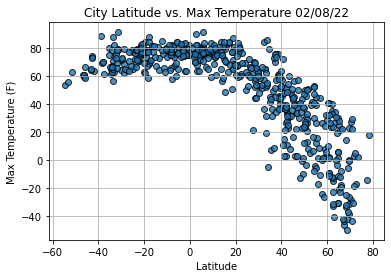

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

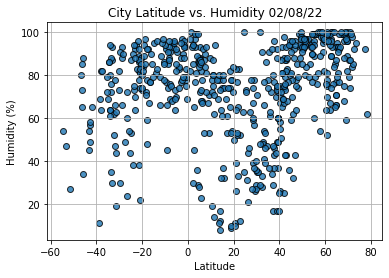

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

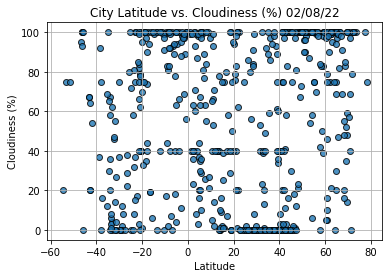

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

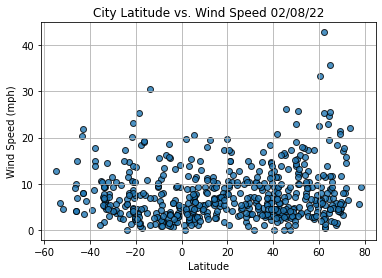

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()